## <font color = "red"> Mini-Projeto 5

### Rede Neural com TensorFlow Para Classificação de Imagens de Vestuário

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


## Mini-Projeto 5

### Rede Neural com TensorFlow Para Classificação de Imagens de Vestuário

Neste Mini-Projeto vamos construir uma rede neural artificial com TensorFlow para classificação de imagens, especificamente classificação de imagens de roupas e acessórios.

Execute cada célula e acompanhe os comentários. Fique à vontade para fazer mudanças e experimentar diferentes configurações. Compare o que fazemos neste Mini-Projeto 5 com o que estudamos no Mini-Projeto 4 ao criar a rede usando apenas operações matemáticas. Aqui, usaremos o TensorFlow com o Keras.

## Instalando e Carregando os Pacotes

In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

In [2]:
# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

> Atenção:

Vamos criar um gráfico do modelo e para isso precisaremos de pacotes Python cujas versões disponíveis com o Anaconda não funcionam adequadamente. Sendo assim, buscaremos versões mais novas, o que requer o uso do conda.

Encerre este Jupyter Notebook, acesse o terminal ou prompt de comando e execute os comandos abaixo:

- conda install python-graphviz
- conda install pydot
- conda install pydotplus

Digite **yes** quando solicitado. Então retorne ao Jupyter Notebook.

In [3]:
# Imports
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

# Configuração de gráficos
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Para tornar a saída deste notebook estável em todas as execuções
np.random.seed(42)
tf.random.set_seed(42)

In [4]:
# Aqui definimos os diretórios onde salvaremos as imagens
PROJECT_ROOT_DIR = "."
PROJECT_NUM = "Mini-Projeto5"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "dados", PROJECT_NUM)
os.makedirs(IMAGES_PATH, exist_ok = True)

In [6]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Alysson Melo" --iversions

Author: Alysson Melo

platform  : 1.0.8
tensorflow: 2.12.0
pandas    : 2.0.3
matplotlib: 3.7.1
numpy     : 1.22.2
keras     : 2.12.0



Observe que estamos usando a versão do Keras dentro do TensorFlow.

## <font color = "red">Carregando e Preparando os Dados

Vamos começar carregando o conjunto de dados Fashion MNIST com artigos de moda masculina e feminina. O Keras possui várias funções para carregar conjuntos de dados populares no `keras.datasets`. O conjunto de dados já está dividido para você entre um conjunto de treinamento e um conjunto de testes, mas pode ser útil dividir ainda mais o conjunto de treinamento para ter um conjunto de validação.

In [7]:
# Carrega o dataset
fashion_mnist = keras.datasets.fashion_mnist

In [9]:
# Extraímos os dados de treino e de teste
(X_treino_full, y_treino_full), (X_teste, y_teste) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


O conjunto de treinamento contém 60.000 imagens em escala de cinza, cada uma com 28x28 pixels:

In [10]:
# Shape
X_treino_full.shape

(60000, 28, 28)

Cada intensidade de pixel é representada como um byte (0 a 255):

In [11]:
# Tipo de dados
X_treino_full.dtype

dtype('uint8')

Vamos dividir o conjunto de treinamento completo em um conjunto de validação e um conjunto de treinamento (menor). Também dimensionamos as intensidades de pixel para o intervalo de 0-1 (padronização) e as convertemos em float, dividindo por 255.

In [14]:
# Preparação dos dados
X_valid, X_treino = X_treino_full[:5000] / 255., X_treino_full[5000:] / 255.
y_valid, y_treino = y_treino_full[:5000], y_treino_full[5000:]
X_teste = X_teste / 255.

Você pode plotar uma imagem usando a função `imshow ()` do Matplotlib, com um mapa de cores **binary**.

In [16]:
X_treino[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17254902, 0.49803922, 0.71372549, 0.7254902 ,
        0.63137255, 0.47058824, 0.21568627, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16470588,
        0.77647059, 0.98431373, 1.        , 0.98431373, 0.97647059,
        0.96862745, 1.    

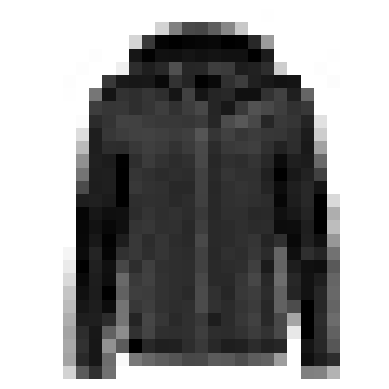

In [17]:
# Plot de uma imagem
plt.imshow(X_treino[0], cmap="binary")
plt.axis('off')
plt.show()

Os rótulos são os IDs de classe (representados como uint8), de 0 a 9:

In [18]:
# Labels (dados de saída) de treino
y_treino

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [19]:
len(y_treino)

55000

Aqui estão os nomes de classe correspondentes:

In [20]:
# Nomes das classes
nomes_classes = ["T-shirt/top", 
                 "Trouser", 
                 "Pullover", 
                 "Dress", 
                 "Coat", 
                 "Sandal", 
                 "Shirt", 
                 "Sneaker", 
                 "Bag", 
                 "Ankle boot"]

Mais detalhes do dataset aqui: https://www.tensorflow.org/datasets/catalog/fashion_mnist

Portanto, a primeira imagem no conjunto de treinamento é um casaco:

In [21]:
# Nome de classe
nomes_classes[y_treino[0]]

'Coat'

O conjunto de validação contém 5.000 imagens e o conjunto de testes contém 10.000 imagens:

In [23]:
# Shape
X_valid.shape

(5000, 28, 28)

In [24]:
# Shape
X_teste.shape

(10000, 28, 28)

Vamos dar uma olhada em uma amostra das imagens no conjunto de dados.

In [25]:
# Função para salvar as imagens
def salva_imagem(fig_id, tight_layout = True, fig_extension = "png", resolution = 300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Salvando a imagem...", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format = fig_extension, dpi = resolution)

Salvando a imagem... plot_fashion_mnist


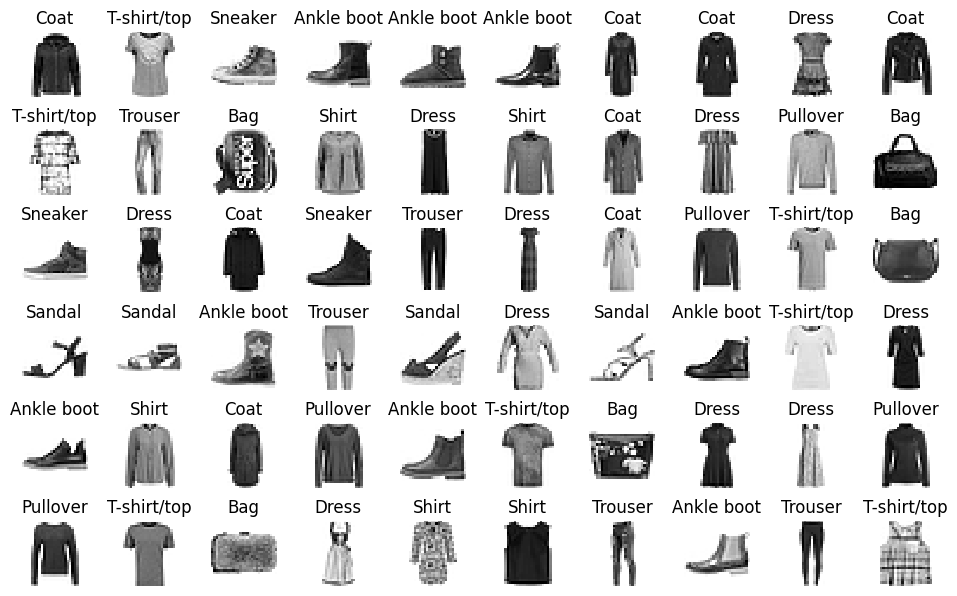

In [26]:
# Plot de algumas imagens

# Vamos plotar 4 linhas e 10 coluns
n_rows = 6
n_cols = 10

# Área de plotagem
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

# Loop pelas linhas e colunas
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_treino[index], cmap = "binary", interpolation = "nearest")
        plt.axis('off')
        plt.title(nomes_classes[y_treino[index]], fontsize = 12)

# Ajusta os plots
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)

# Salva a imagem em disco
salva_imagem('plot_fashion_mnist', tight_layout = False)

# Mostra a imagem
plt.show()

Perfeito! Os dados estão prontos. Vamos construir e treinar o modelo.

## Construção do Modelo

In [27]:
# Modelo de Rede Neural com 2 Camadas Densas

# Cria o objeto do tipo sequência
modelo = keras.models.Sequential()

# Camada para receber os dados de entrada
modelo.add(keras.layers.Flatten(input_shape = [28, 28]))

# Primeira camada oculta com ativação relu
modelo.add(keras.layers.Dense(300, activation = "relu"))

# Segunda camada oculta com ativação relu
modelo.add(keras.layers.Dense(100, activation = "relu"))

# Camada de saída com ativação softmax
# Teremos uma probabilidade prevista para cada classe
modelo.add(keras.layers.Dense(10, activation = "softmax"))

In [28]:
# Limpamos a sessão Keras e 
keras.backend.clear_session()

In [29]:
# Camadas do modelo
modelo.layers

In [30]:
# Sumário do modelo
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


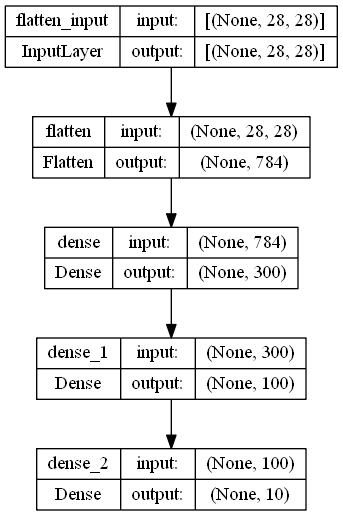

In [31]:
# Vamos criar um plot com o modelo completo e salvar a imagem em disco
keras.utils.plot_model(modelo, IMAGES_PATH + "/modelo_fashion_mnist.png", show_shapes = True)

In [41]:
# Vamos nomear a primeira camada oculta do modelo
hidden1 = modelo.layers[1]
hidden1.name

'dense'

In [42]:
# Verificamos se a camada com novo nome existe
modelo.get_layer(hidden1.name) is hidden1

True

In [43]:
# Extraímos pesos e bias da primeira camada oculta
weights, biases = hidden1.get_weights()

In [44]:
# Pesos que serão usados no começo do treinamento e são gerados de forma aleatória pelo Keras/TensorFlow
weights

array([[ 4.7265403e-02, -1.4769807e-03, -4.2014148e-02, ...,
        -6.1176989e-02,  4.1460842e-03,  3.2755807e-03],
       [-1.4428217e-02, -3.9243814e-02,  5.6609318e-02, ...,
         7.0544735e-02, -7.1784183e-03,  6.7671493e-02],
       [-3.1529229e-02,  4.2033449e-02,  4.8064120e-02, ...,
         3.8364299e-02,  6.5454885e-02, -6.9704175e-02],
       ...,
       [ 4.5664012e-03, -6.2686868e-02,  4.3337636e-02, ...,
        -6.1398089e-02,  5.4465637e-02, -1.7014310e-02],
       [ 3.1836331e-05, -1.7904431e-02,  2.1316640e-02, ...,
         1.9302867e-02,  4.2618066e-02, -1.4846671e-02],
       [-5.6751873e-02,  7.3782369e-02,  9.0453848e-03, ...,
         6.3721716e-02, -4.9689405e-02, -5.5483297e-02]], dtype=float32)

In [45]:
# Shape
weights.shape

(784, 300)

In [46]:
# Bias que serão usados no começo do treinamento
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [47]:
# Shape
biases.shape

(300,)

In [48]:
# Agora compilamos o modelo com o otimizador, função de custo e a métrica
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD
# https://www.tensorflow.org/api_docs/python/tf/keras/losses/sparse_categorical_crossentropy
modelo.compile(optimizer = "sgd", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

Podemos então treinar o modelo.

In [49]:
# Treinamento
history = modelo.fit(X_treino, 
                     y_treino, 
                     epochs = 50, 
                     validation_data = (X_valid, y_valid))

Epoch 1/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7083 - accuracy: 0.7667 - val_loss: 0.5095 - val_accuracy: 0.8282
Epoch 2/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4868 - accuracy: 0.8290 - val_loss: 0.4335 - val_accuracy: 0.8546
Epoch 3/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4409 - accuracy: 0.8442 - val_loss: 0.4968 - val_accuracy: 0.8162
Epoch 4/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4143 - accuracy: 0.8553 - val_loss: 0.3931 - val_accuracy: 0.8670
Epoch 5/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3954 - accuracy: 0.8607 - val_loss: 0.3796 - val_accuracy: 0.8682
Epoch 6/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3770 - accuracy: 0.8666 - val_loss: 0.3758 - val_accuracy: 0.8710
Epoch 7/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3641 - accuracy: 0.8716 - val_loss: 0.3671 - val_accuracy:

In [50]:
# Hiperparâmetros do modelo
history.params

{'verbose': 1, 'epochs': 50, 'steps': 1719}

In [51]:
# Aqui estão as métricas disponíveis após o treinamento (erro e acurácia)
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Salvando a imagem... plot_keras_learning_curves


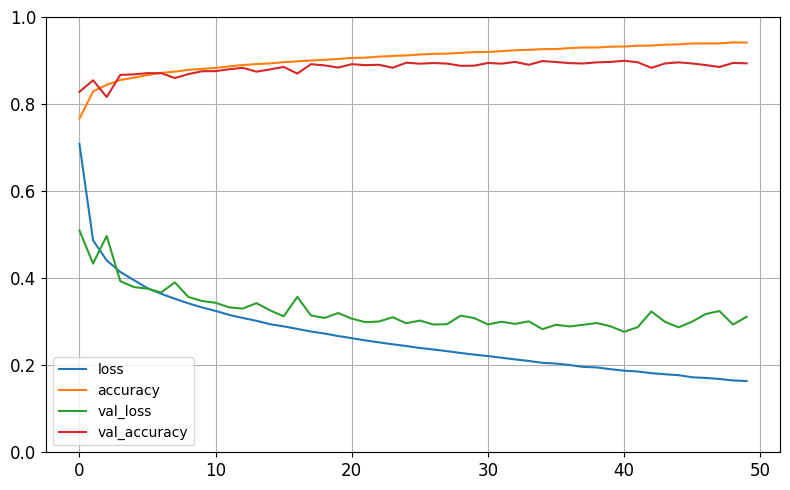

In [52]:
# Colocamos o histórico de treinamento em um dataframe, plotamos e salvamos a figura
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
salva_imagem("plot_keras_learning_curves")
plt.show()

## Avaliando o Modelo

Você já conhece o ritual. Depois de treinar, testamos o modelo com dados de teste.

In [53]:
# Avalia o modelo
modelo.evaluate(X_teste, y_teste)

313/313 [==============================] - 1s 2ms/step - loss: 0.3425 - accuracy: 0.8849


[0.3424556255340576, 0.8848999738693237]

Conseguimos mais de 88% de acurácia em teste. Vamos fazer a previsão de algumas imagens.

In [77]:
# Vamos extrair 5 imagens de teste
X_new = X_teste[:6]

In [78]:
# E então prever a probabilidade de cada classe para cada imagem
y_proba = modelo.predict(X_new)

1/1 [==============================] - 0s 20ms/step


In [79]:
# Previsões de probabilidade
y_proba

array([[1.93407050e-08, 4.49283633e-08, 4.14419446e-07, 6.54119503e-07,
        1.77336730e-07, 4.27336141e-04, 5.73320085e-06, 3.37101799e-03,
        4.79462869e-06, 9.96189833e-01],
       [8.79666986e-05, 4.97927644e-10, 9.99637842e-01, 4.72252992e-09,
        2.15065607e-04, 2.83715569e-13, 5.91108401e-05, 5.50771789e-11,
        2.98994873e-09, 5.61559208e-13],
       [9.39050970e-09, 1.00000000e+00, 5.56927178e-11, 4.73847273e-09,
        8.20175261e-10, 4.50737470e-14, 1.19722478e-11, 1.94873075e-13,
        1.45314018e-13, 2.90514280e-15],
       [8.48148076e-08, 9.99993443e-01, 9.77845693e-10, 6.49253525e-06,
        2.59887560e-08, 5.78118629e-12, 3.75580145e-09, 1.12946649e-11,
        1.91153018e-12, 2.15054970e-11],
       [5.82589172e-02, 1.38517798e-05, 1.93322655e-02, 8.75830709e-04,
        9.18515900e-04, 4.66382275e-08, 9.20597434e-01, 1.64011325e-07,
        2.22139715e-06, 7.17353714e-07],
       [5.20278763e-06, 9.99994278e-01, 8.53940421e-08, 2.01773787e-07,
   

In [80]:
# As previsões de classes são mais fáceis de interpretar
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.06, 0.  , 0.02, 0.  , 0.  , 0.  , 0.92, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [81]:
y_pred_prob = modelo.predict(X_new)

# Usamos np.argmax para pegar o índice da classe com maior probabilidade
y_pred = np.argmax(y_pred_prob, axis=1)

# Exibindo as previsões
print(y_pred)

1/1 [==============================] - 0s 24ms/step


[9 2 1 1 6 1]


In [82]:
# E então extraímos os nomes das classes associados a cada previsão
np.array(nomes_classes)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser'],
      dtype='<U11')

Vamos plotar as previsões.

Salvando a imagem... plot_previsoes_fashion_mnist_images


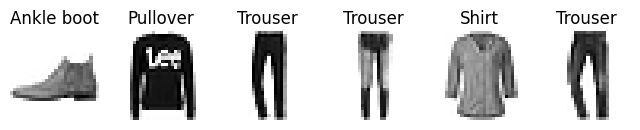

In [ ]:
# Plot
plt.figure(figsize = (8, 6))
for index, image in enumerate(X_ne w):
    plt.subplot(1, 6, index + 1)
    plt.imshow(image, cmap = "binary", interpolation = "nearest")
    plt.axis('off')
    plt.title(nomes_classes[y_teste[index]], fontsize = 12)
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
salva_imagem('plot_previsoes_fashion_mnist_images', tight_layout = False)
plt.show()

Previsões feitas com sucesso!

# Fim